In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ls

drive/  sample_data/


https://github.com/karpathy/micrograd

Only has 2 files

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from graphviz import Digraph

%matplotlib inline

In [2]:
def f(x):
  return 3*x**2 - 4*x + 5

In [3]:
f(3.0)

20.0

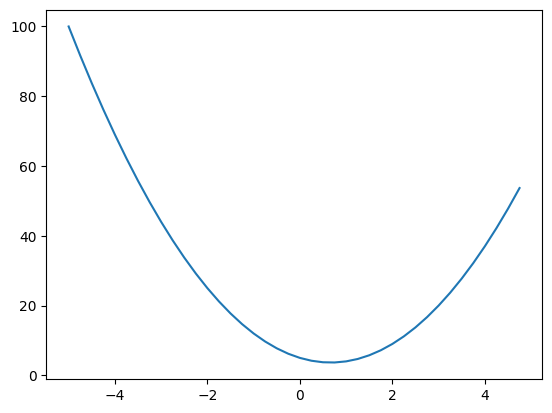

In [4]:
xs = np.arange(-5, 5, 0.25)
ys = f(xs)
plt.plot(xs, ys)

You cant do rule based derivatives for neural net models

In [5]:
h = 0.00000001
x = 2/3
f(x+h)

3.666666666666667

In [7]:
(f(x+h) - f(x))/h
# is 0 bcz derivative is zero at that point

0.0

In [8]:
# little complex

#inputs
a = 2.0
b = -3.0
c = 10.0

# d computation
d = a*b + c
d

4.0

t4esting for derivtive on a,b,c

In [9]:
d1 = a*b + c
a += h
d2 = a*b + c

(d2 - d1)/h

-2.999999981767587

In [10]:
d1 = a*b + c
b += h
d2 = a*b + c

(d2 - d1)/h

1.999999987845058

In [11]:
d1 = a*b + c
c += h
d2 = a*b + c

(d2 - d1)/h

1.000000082740371

Value object

In [50]:
class Value:
    def __init__(self, data, _children=(), _op="", label = ''): #_children is tuple but set inside
      self.data= data
      self._prev = set(_children)
      self._op = _op
      self.label = label
      self.grad = 0.0


    def __repr__(self):
        return f"Value(data={self.data})"


    def __add__(self, other): # using __add__ it will automatically be invoked when val1 + val2 is called
      out = Value(self.data + other.data, (self, other), "+")
      return out


    def __mul__(self, other): # using __mul__ it will automatically be invoked when val1*val2 is called
      out = Value(self.data*other.data, (self, other), "*")
      return out



a = Value(2.0)
b = Value(3.0)
print(a + b)
print(b.__add__(a))
print(a.__add__(b))

print(a*b)
print(b.__mul__(a))


Value(data=5.0)
Value(data=5.0)
Value(data=5.0)
Value(data=6.0)
Value(data=6.0)


In [51]:
a = Value(2.0, label = 'a')
b = Value(-3.0, label = 'b')
c = Value(10.0, label = 'c')
e = a*b
e.label = 'e'
d = e + c
d.label = 'd'
f = Value(-2.0, label = 'f')
L = d*f
L.label = "L"

In [52]:
d._prev

{Value(data=-6.0), Value(data=10.0)}

In [53]:
d._op

'+'

In [54]:
def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root, format='svg', rankdir='LR'):
    """
    format: png | svg | ...
    rankdir: TB (top to bottom graph) | LR (left to right)
    """
    assert rankdir in ['LR', 'TB']
    nodes, edges = trace(root)
    dot = Digraph(format=format, graph_attr={'rankdir': rankdir}) #, node_attr={'rankdir': 'TB'})

    for n in nodes:
        dot.node(name=str(id(n)), label = "{ data %.4f | %s | grad %.4f}" % (n.data, n.label, n.grad), shape='record')
        if n._op:
            dot.node(name=str(id(n)) + n._op, label=n._op)
            dot.edge(str(id(n)) + n._op, str(id(n)))

    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)

    return dot

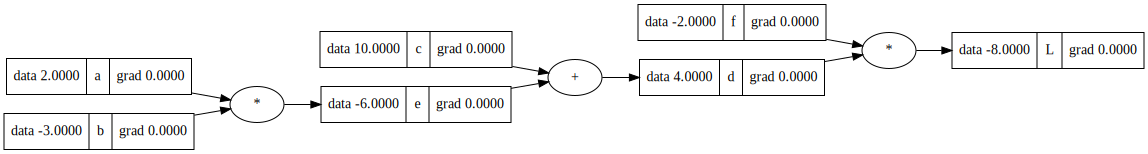

In [55]:
draw_dot(L)

In [56]:
L.grad = 1

In [57]:
def backprop(last_node):
  grad_here = last_node.grad

  if last_node._op == "+":
    for child in last_node._prev:
      child.grad = grad_here
      backprop(child)

  elif last_node._op == "*":
    child1,child2 = list(last_node._prev)[0], list(last_node._prev)[1]

    child1.grad = grad_here * child2.data
    backprop(child1)
    child2.grad = grad_here * child1.data
    backprop(child2)

  else:
    return

backprop(L)

In [59]:
for i in range(10):

  a.data += 0.01 * a.grad
  b.data += 0.01 * b.grad
  c.data += 0.01 * c.grad
  f.data += 0.01 * f.grad

  e = a*b
  d = e + c
  L = d*f

  print(L.data)

  L.grad = 1
  backprop(L)

inf
inf
inf
inf
inf
inf
inf
inf
inf
inf


In [ ]:
def lol():
  h = 0.0001

  a = Value(2.0, label = 'a')
  b = Value(-3.0, label = 'b')
  c = Value(10.0, label = 'c')
  d = a*b + c
  d.label = 'd'
  f = Value(-2.0, label = 'f')
  L = d*f
  L.label = "L"
  L1 = L.data

  a = Value(2.0 + h, label = 'a')
  b = Value(-3.0, label = 'b')
  c = Value(10.0, label = 'c')
  d = a*b + c
  d.label = 'd'
  f = Value(-2.0, label = 'f')
  L = d*f
  L.label = "L"
  L2 = L.data

  print((L2 - L1)/h)

lol()

6.000000000021544


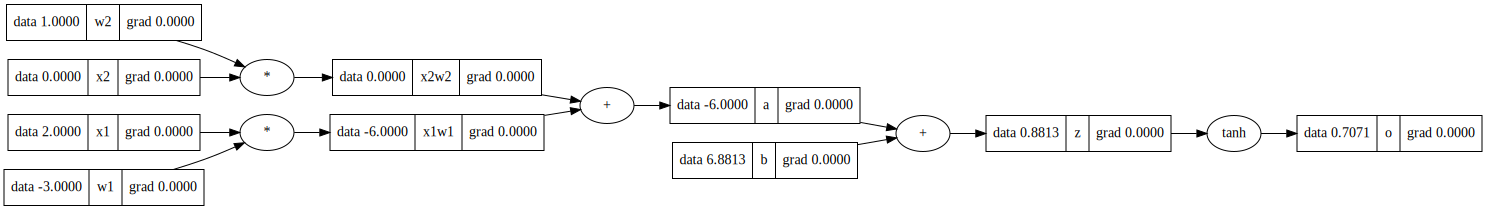

In [71]:
# NEURON

x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

w1 = Value(-3.0, label = "w1")
w2 = Value(1.0, label = "w2")

b = Value(6.8813, label="b")

x1w1 = x1*w1
x1w1.label = "x1w1"

x2w2 = x2*w2
x2w2.label = "x2w2"

a = x1w1 + x2w2
a.label = "a"

z = a + b
z.label = "z"

o = z.tanh()
o.label = 'o'

draw_dot(o)

In [72]:
class Value:
    def __init__(self, data, _children=(), _op="", label = ''): #_children is tuple but set inside
      self.data= data
      self._prev = set(_children)
      self._op = _op
      self.label = label
      self.grad = 0.0


    def __repr__(self):
        return f"Value(data={self.data})"


    def __add__(self, other): # using __add__ it will automatically be invoked when val1 + val2 is called
      out = Value(self.data + other.data, (self, other), "+")
      return out


    def __mul__(self, other): # using __mul__ it will automatically be invoked when val1*val2 is called
      out = Value(self.data*other.data, (self, other), "*")
      return out

    def tanh(self):
      x = self.data
      t = ((math.exp(2*x) - 1)/(math.exp(2*x) + 1))
      out = Value(t, (self,), 'tanh')
      return out

In [73]:
o.grad = 1

def backprop(last_node):
  grad_here = last_node.grad

  if last_node._op == "+":
    for child in last_node._prev:
      child.grad = grad_here
      backprop(child)

  elif last_node._op == "*":
    child1,child2 = list(last_node._prev)[0], list(last_node._prev)[1]

    child1.grad = grad_here * child2.data
    backprop(child1)
    child2.grad = grad_here * child1.data
    backprop(child2)

  elif last_node._op == "tanh":
    child1 = list(last_node._prev)[0]
    child1.grad = grad_here * (1 - last_node.data*last_node.data)
    backprop(child1)

  else:
    return

backprop(o)

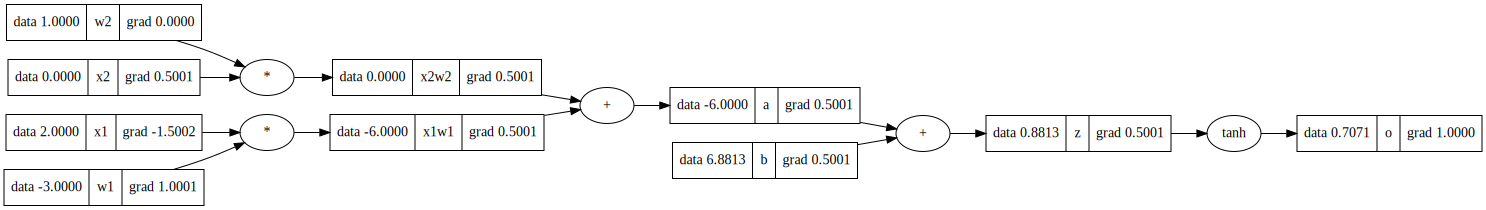

In [74]:
draw_dot(o)